[1] 0.5054959

0.4999995 with absolute error < 2e-05

0.5 with absolute error < 1.4e-06

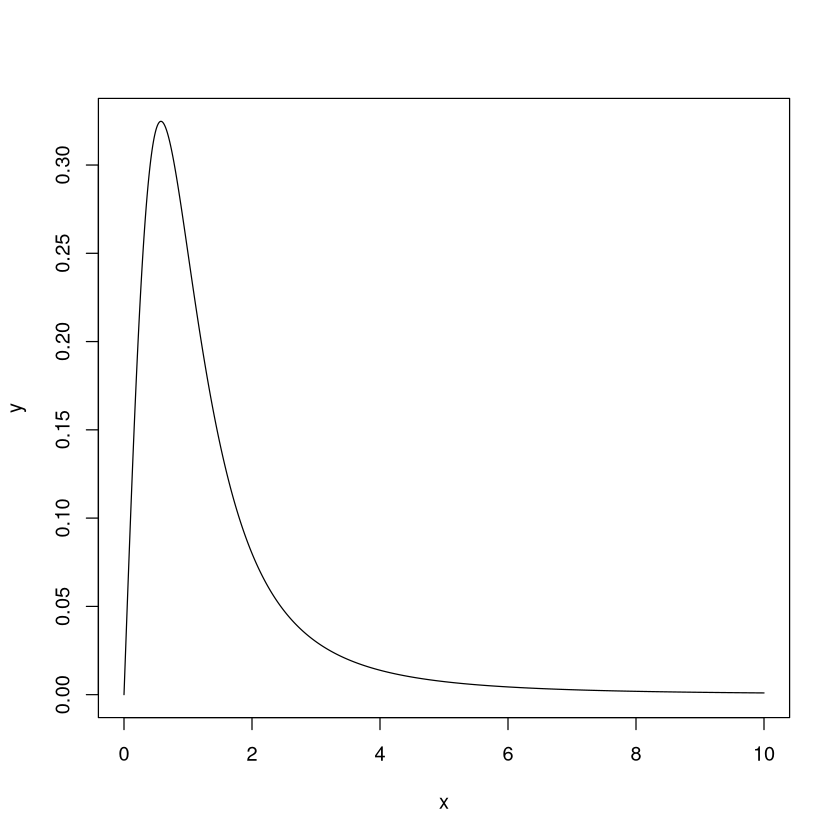

In [59]:
#1 a)
# feita a substituição de x por y, a função que antes era g(x) na integral vira h(y)
# e h(y) = (((1/y)-1)/( 1+ 2* ((1/y) -1)^2 + ( (1/y) -1)^4))*(-1/y^2)

h <- function(y){
    result <- (((1/y)-1)/( 1+ 2* ((1/y) -1)^2 + ( (1/y) -1)^4))*(1/y^2)
    return (result)
}


BIGINT = 1000
x <-runif(BIGINT)
theta <- h(x)
result <- sum(theta)/BIGINT
result


# só para provar que esse resultado bateu com a integral da função original:
g <- function(x){
    result <- ((x)/(1 + 2*x^2 + x^4))
    return (result)
}

integrate(g, lower = 0, upper = BIGINT)
integrate(h, lower = 0, upper = 1)


#b) Gráfico gerado, mas conforme a correção que o professor pediu.
x <- seq(from=0, to=10, by=0.01)
y <- g(x)
plot(x,y, type='l')

[1] NA


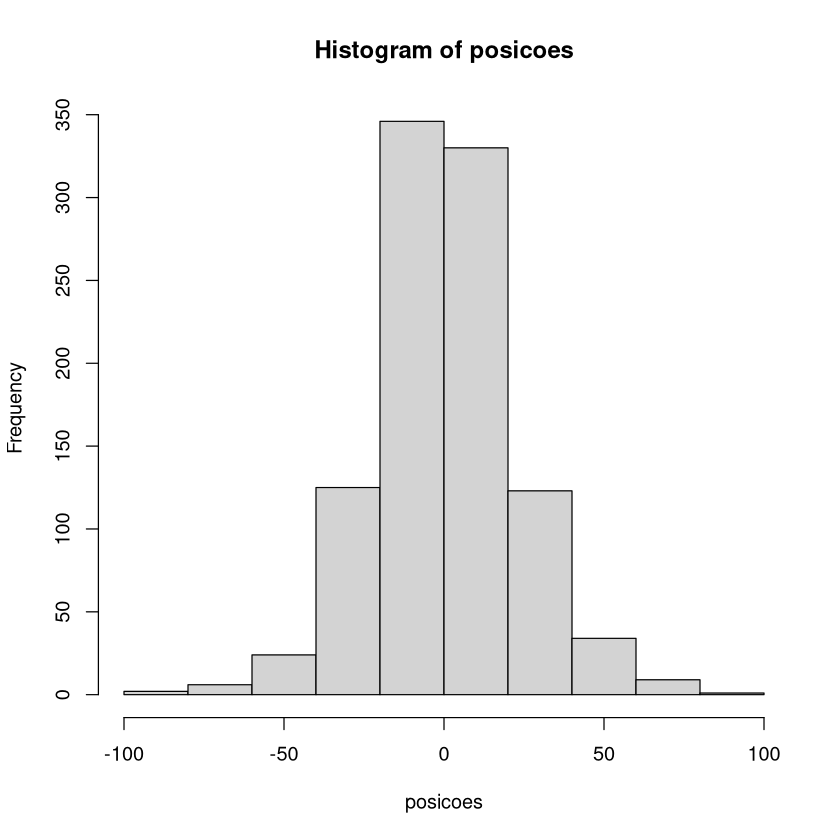

In [61]:
#2
#a) Para essa questão eu vou alterar um pouco a função, de forma que ela me retorne as posição final de Luke


gera_posicao <- function (n_passos){
    pos <- 0 
    for (j in 1:n_passos){ 
        moeda <- sample(c(1,0), size = 1)
        if (moeda == 1){ 
          pos <- pos + 1  
        } else
          pos <- pos - 1
      }
    return (pos)
}


# fazendo Luke dar Progressivamente 1 passo, depois 2 passos, depois 3 passos, e assim por diante,
# armazenando a posição final dele num vetor após cada etapa.


posicoes <- vector()
for(i in 1:1000){
    pos <- gera_posicao(i)
   posicoes<- c(posicoes,pos) 
}

# fazer isso resulta em uma distribuição normal onde na vasta maioria das etapas Luke terminou nas posições 
# mais próximas de zero

hist(posicoes)

# Segundo Yoda, Luke só pode voltar à origem depois de um número par de rodadas.
# isso também significa também que se ele dar passos em números ímpares, ele não voltará no início
# então eu vou gerar mil números impares e fazer Luke dar passos com base neles

posicoes2 <- vector()

geraImpares <- function(n){
    vetor <- vector()
    aux <-3
    for(i in 2:n){ 
        vetor <- c(vetor,aux) 
        aux <- aux + 2
    }
    return (vetor)
}

l <- geraImpares(1000)

for(i in l){
    pos <- gera_posicao(i)
   posicoes2 <- c(posicoes2,pos) 
}


# procura resultados em chegou na posição 0 após das passos ímpares em 1000 etapas
bateu <- match(0, posicoes2)
print(bateu)

# de fato, em apenas passos que são ímpares Luke nunca chega na posição inicial, visto que
# em todas as etapas nenhuma delas concluiu no ponto 0. 
# Assim sendo, dada a conclusão deste experimento, eu concordo com o Yoda.

In [62]:
#2
#b)

#Eu resolvi criar uma função para fazer is items (i) à (iv) 

BIGINT = 10000
calcProb <- function (n_passos){
    sucessos <- 0
    pos <- 0 

    for (i in 1:BIGINT){
        for (j in 1:n_passos){ 
            moeda <- sample(c(1,0), size = 1)
            if (moeda == 1){ 
              pos <- pos + 1  
            } else
              pos <- pos - 1
          }
        if (pos == 0) { #se voltou pro mesmo lugar soma um sucesso
          sucessos <- sucessos + 1
        }
        #o Luke Skywalker precisa voltar para a posição inicial no final de cada tentativa:
        pos <-0
    }
    
    x <- sucessos/BIGINT
    return (x)
    
}

#(i)
r <- calcProb(4)
print(r)

#(ii)
r <- calcProb(6)
print(r)

#(iii)
r <- calcProb(10)
print(r)

#(iv)
r <- calcProb(20)
print(r)




[1] 0.3782
[1] 0.3161
[1] 0.2538
[1] 0.1746
